<a href="https://colab.research.google.com/github/NicoPatalagua/BigData/blob/master/windows2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pyspark.sql import functions as f
from pyspark.sql import SparkSession

spark =  SparkSession.builder.appName("test").getOrCreate()

In [0]:
df_ec = spark.read.csv("E*.csv", header=True, inferSchema=True)
df_aval = spark.read.csv("AVAL*.csv", header=True, inferSchema=True)
df_avh = spark.read.csv("AVH*.csv", header=True, inferSchema=True)
df_ec.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [0]:

df = df_ec.select(f.lit("ECOPETROL").alias("Empresa"), "*")
df = df.union(df_aval.select(f.lit("AVAL").alias("Empresa"), "*"))
df = df.union(df_avh.select(f.lit("AVIANCA").alias("Empresa"), "*"))


## En qué fecha se logró el mejor precio para cada empresa

In [0]:
w = Window.partitionBy("empresa").orderBy(df.Close.desc()).rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

In [0]:
df.select("*", f.row_number().over(w).alias("no")).where("no==1").show()

+---------+-------------------+---------+-----+-----+---------+---------+------+---+
|  Empresa|               Date|     Open| High|  Low|    Close|Adj Close|Volume| no|
+---------+-------------------+---------+-----+-----+---------+---------+------+---+
|     AVAL|2020-01-14 00:00:00|     8.87| 8.88| 8.81|     8.88| 8.771908|138200|  1|
|ECOPETROL|2019-04-08 00:00:00|21.700001|21.99|21.51|21.969999| 21.07328|598000|  1|
|  AVIANCA|2020-02-19 00:00:00|     4.86| 5.02| 4.83|      5.0|      5.0|251100|  1|
+---------+-------------------+---------+-----+-----+---------+---------+------+---+



In [0]:
df.select("Empresa", "Close", f.min("Close").over(w)).show()

+-------+-----+------------------------------------------------------------------------------------------------------------------------------+
|Empresa|Close|min(Close) OVER (PARTITION BY empresa ORDER BY Close DESC NULLS LAST ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)|
+-------+-----+------------------------------------------------------------------------------------------------------------------------------+
|   AVAL| 8.88|                                                                                                                          3.34|
|   AVAL| 8.86|                                                                                                                          3.34|
|   AVAL| 8.85|                                                                                                                          3.34|
|   AVAL| 8.85|                                                                                                                          3.34|

In [0]:
df.select("*", f.row_number().over(w).alias("no")).where("no<=5").show()

+---------+-------------------+---------+---------+---------+---------+---------+-------+---+
|  Empresa|               Date|     Open|     High|      Low|    Close|Adj Close| Volume| no|
+---------+-------------------+---------+---------+---------+---------+---------+-------+---+
|     AVAL|2020-01-14 00:00:00|     8.87|     8.88|     8.81|     8.88| 8.771908| 138200|  1|
|     AVAL|2020-01-08 00:00:00|     8.79|     8.87|     8.73|     8.86| 8.752151| 613900|  2|
|     AVAL|2020-01-09 00:00:00|     8.87|    8.923|     8.75|     8.85| 8.742273| 432200|  3|
|     AVAL|2020-01-13 00:00:00|     8.85|     8.88|    8.807|     8.85| 8.742273| 190500|  4|
|     AVAL|2020-01-06 00:00:00|     8.81|      8.9|     8.76|     8.84| 8.732395|  52000|  5|
|ECOPETROL|2019-04-08 00:00:00|21.700001|    21.99|    21.51|21.969999| 21.07328| 598000|  1|
|ECOPETROL|2019-04-01 00:00:00|21.700001|    21.93|    21.49|21.879999|20.986954| 655500|  2|
|ECOPETROL|2019-04-10 00:00:00|21.709999|21.959999|21.709999

In [0]:
pdf = df.toPandas()


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

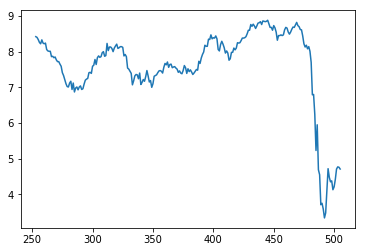

In [0]:
plt.plot(pdf[pdf["Empresa"]=="AVAL"]["Close"])

In [0]:
pdf[pdf["Empresa"]=="ECOPETROL"]

,Empresa,Date,Open,High,Low,Close,Adj Close,Volume
0,ECOPETROL,2019-04-01,21.700001,21.930000,21.490000,21.879999,20.986954,655500
1,ECOPETROL,2019-04-02,21.889999,22.100000,21.790001,21.840000,20.948587,1140400
2,ECOPETROL,2019-04-03,22.000000,22.139999,21.760000,21.830000,20.938995,1035600
3,ECOPETROL,2019-04-04,21.790001,21.809999,21.350000,21.400000,20.526545,1016400
4,ECOPETROL,2019-04-05,21.570000,21.790001,21.510000,21.580000,20.699198,555900
5,ECOPETROL,2019-04-08,21.700001,21.990000,21.510000,21.969999,21.073280,598000
6,ECOPETROL,2019-04-09,21.889999,21.910000,21.530001,21.610001,20.727976,980500
7,ECOPETROL,2019-04-10,21.709999,21.959999,21.709999,21.860001,20.967772,647900
8,ECOPETROL,2019-04-11,21.750000,21.809999,21.180000,21.320000,20.449812,1045200
9,ECOPETROL,2019-04-12,21.690001,21.690001,20.950001,21.000000,20.142872,1063200


In [0]:
df.groupBy("Empresa").agg(f.min("Close"), f.max("Close")).show()

+---------+----------+----------+
|  Empresa|min(Close)|max(Close)|
+---------+----------+----------+
|     AVAL|      3.34|      8.88|
|ECOPETROL|      6.68| 21.969999|
|  AVIANCA|      0.75|       5.0|
+---------+----------+----------+



In [0]:
datetime_series = pd.to_datetime(pdf['Date'])

datetime_index = pd.DatetimeIndex(datetime_series.values)
pdf2=pdf.set_index(datetime_index)

In [0]:
w = Window.partitionBy("Empresa").orderBy("Date").rowsBetween(-20, 0)

In [0]:
df.select("Empresa", "Date", f.collect_list("Close").over(w).alias("w"), 
          f.avg("Close").over(w).alias("avg")).show()

+-------+-------------------+--------------------+-----------------+
|Empresa|               Date|                   w|              avg|
+-------+-------------------+--------------------+-----------------+
|   AVAL|2019-04-10 00:00:00|              [8.42]|             8.42|
|   AVAL|2019-04-11 00:00:00|         [8.42, 8.4]|             8.41|
|   AVAL|2019-04-12 00:00:00|   [8.42, 8.4, 8.34]|8.386666666666667|
|   AVAL|2019-04-15 00:00:00|[8.42, 8.4, 8.34,...|            8.355|
|   AVAL|2019-04-16 00:00:00|[8.42, 8.4, 8.34,...|            8.328|
|   AVAL|2019-04-17 00:00:00|[8.42, 8.4, 8.34,...|8.328333333333333|
|   AVAL|2019-04-18 00:00:00|[8.42, 8.4, 8.34,...|8.315714285714286|
|   AVAL|2019-04-22 00:00:00|[8.42, 8.4, 8.34,...|          8.30375|
|   AVAL|2019-04-23 00:00:00|[8.42, 8.4, 8.34,...|8.296666666666667|
|   AVAL|2019-04-24 00:00:00|[8.42, 8.4, 8.34,...|            8.273|
|   AVAL|2019-04-25 00:00:00|[8.42, 8.4, 8.34,...|             8.25|
|   AVAL|2019-04-26 00:00:00|[8.42